# AGA 5926 
## Lecture 7: Image manipulation with astropy, astroquery and splusdata

### Carlos Eduardo Barbosa (IAG/USP)
### São Paulo, July 14, 2021

The goal of this lecture is to present basic image manipulation using data from S-PLUS. By the end of this lecture, you will be able to 1) Obtain basic information galaxies (coordinates, sizes) using the astroquery tool; 2) Learn a little about the powerful astropy package; 3) Use the splusdata Python interface to obtain images from the S-PLUS server; 3) Manipulate these images to obtain information about physical properties of galaxies.

As we have seen in previous classes, surveys such as SDSS and S-PLUS provide an immense amount of data which can be used for different scientific problems, including catalogs and images. Moreover, data from diverse datasets are available in large databases, such as SIMBAD, Vizier, and can be explored, combined and visualized with graphic tools such as Topcat. However, many research projects require the manipulation of large amounts of data. For this purpose, we will leverage the power of the Python language to perform repetitive tasks.

## The problem

You are working with your advisor, [Dr. John Louis Emil Dreyer (1882-1926)](https://en.wikipedia.org/wiki/John_Louis_Emil_Dreyer), a famous astronomer who recently come back from the dead after 95 years of rest, and is very excited with the marvelous development of astronomy in recent years! In particular, he wants to check out recent images from some beautiful galaxies that he catalogued in the not-so-new-anymore [New General Catalogue](https://en.wikipedia.org/wiki/New_General_Catalogue). He is a little bit rusty, but he came up with a list of galaxies from the top of his mind containing galaxies that he wants to see again


In [1]:
sample = ["NGC1365", 'NGC4030', "NGC3464", "NGC3511", "NGC0428", "NGC7089"]
sample

['NGC1365', 'NGC4030', 'NGC3464', 'NGC3511', 'NGC0428', 'NGC7089']

He is still getting used with internet, and Google for him only means only [a very big number](https://en.wikipedia.org/wiki/Googol), so you have an excellent opportunity to impress him with some nice images!

## Getting more info about galaxies with astroquery

Perhaps this is the first time you have heard about these galaxies, and you want to learn more about them! A very handy tool to obtain information about galaxies is the [NASA/IPAC  EXTRAGALACTIC  DATABASE](http://ned.ipac.caltech.edu/forms/byname.html), but you don't want to fill the query manually for each galaxy. Here is how you can obtain some information about these galaxies with [astroquery](https://astroquery.readthedocs.io/en/latest/), a Python interface for queries in several archives. Let's start with NGC1365.

In [2]:
from astroquery.ned import Ned

result_table = Ned.query_object(sample[0])
result_table

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,NGC 1365,53.40155,-36.1404,G,1636.0,0.005457,,10.32,--,1140,35,382,79,62,20,0


Not bad! Just two lines of code and we already learned some additional info about one of our galaxies. In the table, we found information about the coordinates of the galaxy in the sky in the fields RA and DEC, the recession velocity of the system, redshift, etc... 

The astroquery package can be used as an interface to several archives, including general archives (SIMBAD, Vizier, NED), more specific projects (ALFALFA, Hubble, MAST), telescopes (Gemini) and even for NASA/ADS queries to search for bibliographic information, as you can see in this [list](https://astroquery.readthedocs.io/en/latest/#available-services). The details of how to perform queries vary according to each case, but the documentation is usually decent. In some cases, queries are performed in SQL, such as in the GAMA archive.

In [3]:
from astroquery.gama import GAMA

result_gama = GAMA.query_sql('SELECT * FROM SpecAll LIMIT 100')
print(result_gama)

       SPECID       SURVEY SURVEY_CODE     RA    ... DIST IS_SBEST IS_BEST
------------------- ------ ----------- --------- ... ---- -------- -------
1030358159811700736   SDSS           1 211.73487 ... 0.05        1       1
1030358434689607680   SDSS           1 211.51452 ... 0.14        1       1
1030358984445421568   SDSS           1 211.78462 ... 0.02        1       1
1030359809079142400   SDSS           1 211.63878 ... 0.05        1       1
1030360358834956288   SDSS           1 211.79006 ... 0.04        1       1
1030360633712863232   SDSS           1 211.71473 ... 0.05        0       0
1030361183468677120   SDSS           1 211.74528 ... 0.04        1       0
1030361733224491008   SDSS           1 211.50587 ... 0.02        1       1
1030363382491932672   SDSS           1 211.63321 ... 0.02        1       1
1030363657369839616   SDSS           1 211.54913 ... 0.06        0       0
                ...    ...         ...       ... ...  ...      ...     ...
1031441727430354944   SDS

Let's inspect more about the resulting object.

In [4]:
type(result_gama)

astropy.table.table.Table

Good, this is a table object produced with astropy! Luckly, we have just learned about these tables, so let's compile a table containing all our galaxies. But first, let's understand a little bit more about how to handle tables with astropy. Now you can save your table to the disk using the methods provided by astropy.





In [5]:
result_gama.write("my_table.fits", overwrite=True) # I like FITS files!

Note: Python is case-sensitive, so table is different from Table; Python classes are capitalized by convention. 

## Table utilities from astropy

Table objects from astropy are very flexible objects which can be easily manipulated, similarly to numpy arrays. As such, they can be sliced, used in numerical computations, etc. However, differently from numpy arrays, they can easily deal with data of different types (str, float, int). Moreover, the  Table object can also be used as a direct interface to read tables of different formats.

In [6]:
from astropy.table import Table

my_table = Table.read("my_table.fits")
my_table

SPECID,SURVEY,SURVEY_CODE,RA,DEC,WMIN,WMAX,Z,NQ,PROB,FILENAME,URL,URL_IMG,CATAID,GAMA_NAME,IC_FLAG,DIST,IS_SBEST,IS_BEST
int64,bytes4,int16,float64,float32,float32,float32,float32,int16,int16,bytes52,bytes73,bytes77,int32,bytes23,int16,float32,int16,int16
1030358159811700736,SDSS,1,211.73487,-1.59471,3815.93,9206.62,0.02919,5,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0581.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0581.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0581.png,491457,GAMAJ140656.36-013541.0,4104,0.05,1,1
1030358434689607680,SDSS,1,211.51452,-1.65754,3815.93,9206.62,0.05424,5,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0582.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0582.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0582.png,460298,GAMAJ140603.48-013927.2,4104,0.14,1,1
1030358984445421568,SDSS,1,211.78462,-1.71899,3815.93,9206.62,0.11341,5,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0584.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0584.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0584.png,460345,GAMAJ140708.30-014308.3,4104,0.02,1,1
1030359809079142400,SDSS,1,211.63878,-1.93563,3816.81,9206.62,0.10234,5,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0587.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0587.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0587.png,484623,GAMAJ140633.30-015608.2,4104,0.05,1,1
1030360358834956288,SDSS,1,211.79006,-1.89456,3817.68,9206.62,0.10289,5,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0589.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0589.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0589.png,484637,GAMAJ140709.61-015340.3,4104,0.04,1,1
1030360633712863232,SDSS,1,211.71473,-1.54075,3817.68,9206.62,0.02955,5,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0590.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0590.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0590.png,491454,GAMAJ140651.53-013226.7,4104,0.05,0,0
1030361183468677120,SDSS,1,211.74528,-1.89508,3817.68,9206.62,0.29631,3,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0592.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0592.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0592.png,484646,GAMAJ140658.86-015342.3,4104,0.04,1,0
1030361733224491008,SDSS,1,211.50587,-1.53749,3818.56,9206.62,0.07021,5,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0594.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0594.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0594.png,491414,GAMAJ140601.41-013214.9,4104,0.02,1,1
1030363382491932672,SDSS,1,211.63321,-1.96885,3819.44,9206.62,0.03509,5,0,/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0600.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0600.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0600.png,484621,GAMAJ140631.97-015807.8,4104,0.02,1,1


The name of columns is very useful to perform operations over the table, and they can be accessed with the colnames method

In [7]:
print(my_table.colnames)

['SPECID', 'SURVEY', 'SURVEY_CODE', 'RA', 'DEC', 'WMIN', 'WMAX', 'Z', 'NQ', 'PROB', 'FILENAME', 'URL', 'URL_IMG', 'CATAID', 'GAMA_NAME', 'IC_FLAG', 'DIST', 'IS_SBEST', 'IS_BEST']


We can combine them in different ways, using operations like stack (horizontal and vertical), join (to match tables according to columns).

## Challenge 1: getting information about Dreyer's galaxies and making a table with vstack
Hint: Check out the documentation from astropy's vstack about how to use the method

In [2]:
# Hint for challenge 1
from astropy.table import vstack

# Write your solution here!

Solution for challenge 1 below.

In [9]:
# Solution for challenge 1
from astropy.table import vstack

table = []
for i, galaxy in enumerate(sample):
    result = Ned.query_object(galaxy)
    table.append(result)
table = vstack(table)
table

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,NGC 1365,53.40155,-36.1404,G,1636.0,0.005457,,10.32,--,1140,35,382,79,62,20,0
1,NGC 4030,180.09844,-1.10009,G,1458.0,0.004863,,11.6g,--,358,11,115,53,35,11,0
1,NGC 3464,163.66671,-21.06664,G,3737.0,0.012465,,12.4B,--,119,6,74,17,15,20,0
1,NGC 3511,165.84904,-23.08678,G,1109.0,0.003699,,11.53,--,177,10,119,22,22,18,0
1,NGC 0428,18.23212,0.98156,G,1155.0,0.003853,,11.91,--,266,10,70,33,25,8,0
1,MESSIER 002,323.36255,-0.82332,*Cl,--,--,,16.05,--,41,2,2,3,0,2,0


## More about astropy

[Astropy](https://www.astropy.org/) is the result of a huge effort from astronomers around the world to provide facilites for data analysis in the field. It provides many subpackages (such as the table used above) with many important features, and we can't cover all of it in one lecture. Below I indicate just a few highlights that I have been used extensively in my research, including some that I have just come across that I will start using tomorrow!

### Units and Quantities

Some examples of usage.

In [10]:
from astropy import units as u

wave = 6600 * u.Angstrom # H-alpha line 
print(wave)
wave = wave.to(u.m)
print(f"Accessing values and units")
print(wave.value)
print(wave.unit)
f"Wavelength of Halpha in meters: {wave.to(u.m).value}"

6600.0 Angstrom
Accessing values and units
6.600000000000001e-07
m


'Wavelength of Halpha in meters: 6.600000000000001e-07'

In [11]:
import numpy as np

x = np.linspace(-100, 100, 2001) * u.m
t = 5 * u.s
y = x / t
y

<Quantity [-20.  , -19.98, -19.96, ...,  19.96,  19.98,  20.  ] m / s>

## Constants
Interface for constants including units.

In [12]:
from astropy import constants as const

const.c.to(u.km/u.s)

<Quantity 299792.458 km / s>

### Matplotlib interface

Matplotlib does not support arrays with units natively, but you can use the trick below to plot Quantity arrays easily (without needing to always use the .value attribue).

Text(0.5, 0, 'Distance (m)')

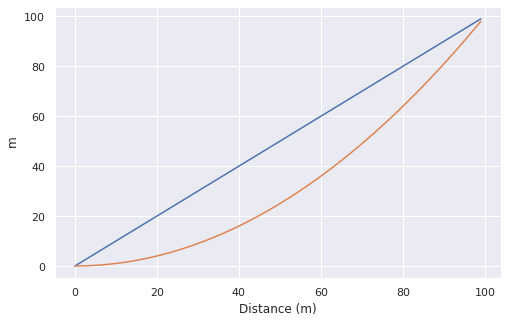

In [13]:
from astropy.visualization import quantity_support
quantity_support()
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

x = np.arange(100) * u.m
y1 = x
y2 = np.arange(100)**2 * u.cm
plt.figure(figsize=(8,5))
plt.plot(x, y1, y2)
plt.xlabel("Distance (m)")

### Cosmology

Even if you do not work with cosmology, it is customary to use cosmological parameters in observational works. 

Text(0.5, 0, 'redshift')

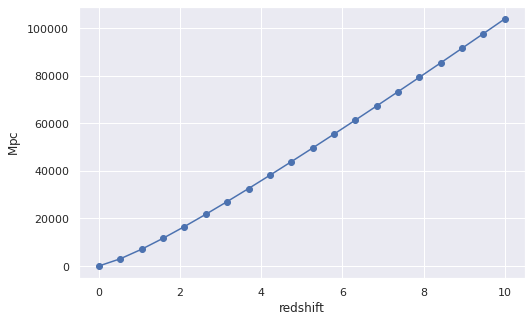

In [14]:
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
z = np.linspace(0, 10, 20) # Redshift of a source
dL = cosmo.luminosity_distance(z)  
plt.figure(figsize=(8,5))
plt.plot(z, dL, "o-b")
plt.xlabel("redshift")

One common question that depends on cosmological parameters is the lookback time, which is the age difference between now and the time when photons from a object were emmited for a given cosmology. The cosmology package offer simple tools to calculate the lookback time for different assumptions 

\begin{equation*}
E(z) = \sqrt{\Omega_M(1+z)^3+\Omega_k(1+z)^2+\Omega_\lambda}\\
t_L=t_H\int_0^z\frac{dz'}{(1+z')E(z')}
\end{equation*}

However, you don't have to perform these calculations by-hand every time you asked this question! There are very simple methods for useful cosmological parameters in the cosmology package.

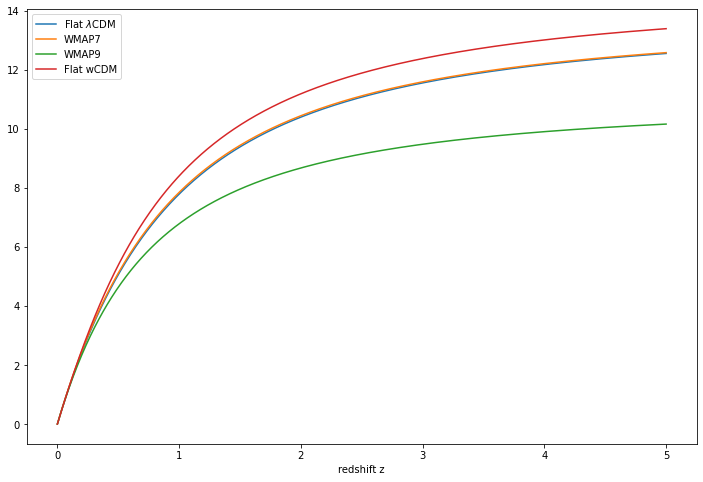

In [5]:
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import FlatwCDM
from astropy.cosmology import WMAP7 as cosmo1
from astropy.cosmology import WMAP9 as cosmo2
# Inventing some cosmologies
cosmo3 = FlatLambdaCDM(H0=70, Om0=0.6, Ob0=0.05) # Not much dark matter
cosmo4 = FlatwCDM(H0=71.58, Om0=0.262, w0=-1.5) # Weird equation of state
labels = ["Flat $\lambda$CDM", "WMAP7", "WMAP9", "Flat wCDM" ]
cosmos = [cosmo1, cosmo2, cosmo3, cosmo4]
z = np.linspace(0, 5, 1000) # Determining a series of redshifts
plt.figure(figsize=(12, 8))
for i, cosmo in enumerate(cosmos):
    plt.plot(z, cosmo.lookback_time(z), label=labels[i])
plt.xlabel("redshift z")
plt.legend()

## Getting colored images from S-PLUS with splusdata

The [splusdata](https://pypi.org/project/splusdata/) provides a powerful interface to the S-PLUS database. We need first estabilish a connection with the server.

In [17]:
import getpass
import splusdata
sns.set_style({'axes.grid' : False}) # Remove grid from seaborn

print("Getting connection with S-PLUS")
username = input(prompt="Login: ")
password = getpass.getpass("Password: ")
conn = splusdata.connect(username, password)

Getting connection with S-PLUS


Login:  kadu
Password:  ·········


You have access to internal data


Now it is time to impress Dreyer! The splusdata provides a simple interface to obtain pretty images directly from the database. 

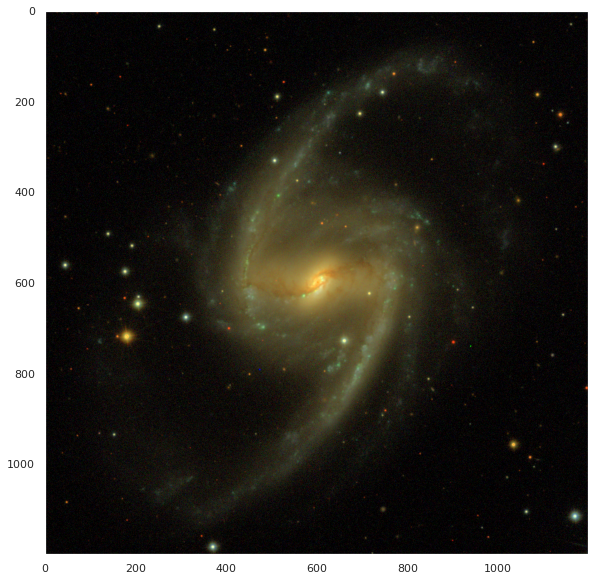

In [18]:
ra = 53.40155
dec = -36.1404
size = 1200
img = conn.get_img(ra, dec, size)
plt.figure(figsize=(10, 10))
plt.imshow(img)

## Challenge 2: Impressing Dreyer with pretty pictures!
Make a small gallery of images for all galaxies in his sample. 

Hint: use matplotlib's subplot to plot all galaxies side-by-side. Use the code showing random samples of a normal distribution with varying sizes as a reference.

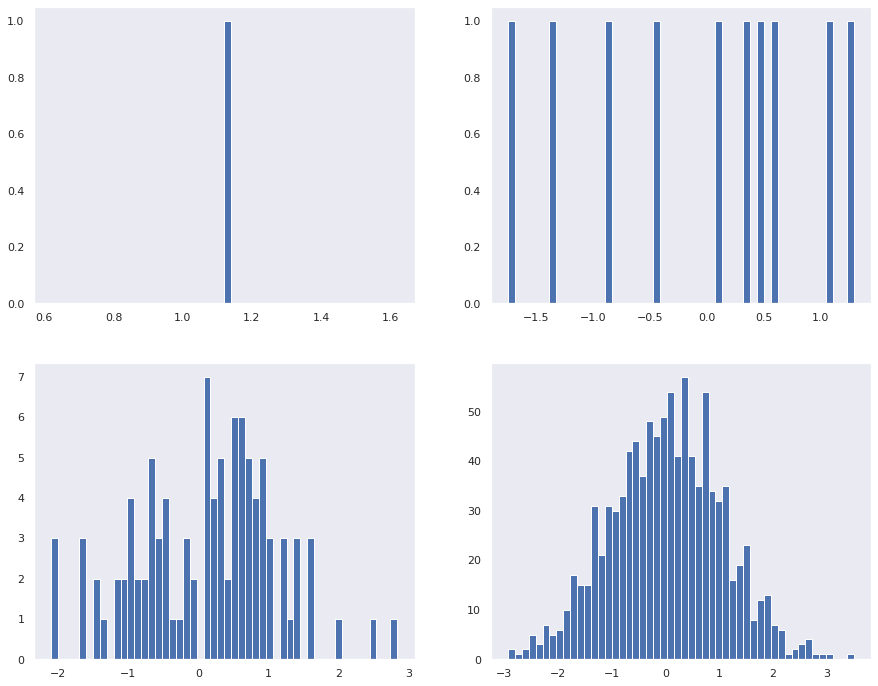

In [19]:
figure = plt.figure(figsize=(15, 12))
plt.subplot(2,2,1) # Initiate with 2 rows and 2 rows, first plot
plt.hist(np.random.normal(0, 1, 1), bins=50)
plt.subplot(2,2,2) 
plt.hist(np.random.normal(0, 1, 10), bins=50)
plt.subplot(2,2,3)
plt.hist(np.random.normal(0, 1, 100), bins=50)
plt.subplot(2,2,4)
_ = plt.hist(np.random.normal(0, 1, 1000), bins=50)

In [1]:
# Write your solution here!


Solution for the challenge:

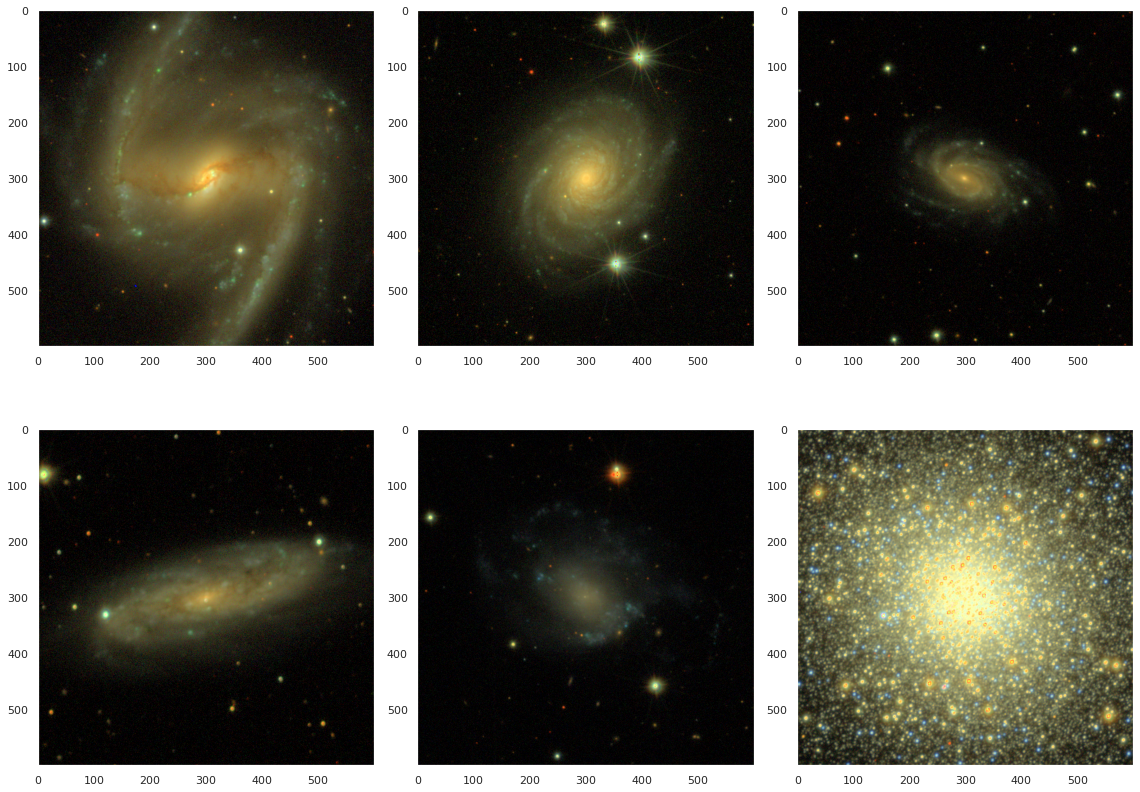

In [20]:
size = 600
fig = plt.figure(figsize=(16, 12))
for i, galaxy in enumerate(table):
    ra = galaxy["RA"]
    dec = galaxy["DEC"]
    img = conn.get_img(ra, dec, size)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)

### Astropy support to FITS files

The colored images are very nice, but they are not always useful for scientific analysis, as their fluxes are not described in physical units. Instead, what we need in practice are FITS images which contain flux as measured by the telescopes. Astropy provide several ways to handle with FITS data, including some very practical commands to work with them. 

FITS files are multi-layered, meaning that you can mix images and tables in the same file, each having its own layer (called HDU). If you don't know what is within a fits file, you can simply inspect it.

In [16]:
from astropy.io import fits # I/O means input/output

filename = "my_table.fits"

# Inspecting fits file
hdulist = fits.open(filename)
hdulist.info()

Filename: my_table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     46   100R x 19C   [K, 4A, I, D, E, E, E, E, I, I, 52A, 73A, 77A, J, 23A, I, E, I, I]   


Each HDU contains data and metadata (header) explaining what is up with the data in the unit. Some handful features in astropy include 

In [ ]:
data = fits.getdata("filename", hdu=1)  # Getting data from HDU=1 to an array in memory
h = fits.getheaderr("filename", hdu=2) # Getting header (metadata) of HDU2 in a file.

We don't have any fits file for images yet! Let's get some data from S-PLUS.

### Getting FITS files from S-PLUS data with splusdata

The S-PLUS data provides reduced images (which means they have been already properly treated by software to units that are physical, although not calibrated yet; they are not raw images, which are very noisy!). Here is how to download a FITS image using splusdata:

In [26]:
band = "R"
galaxy = "NGC1365"
ra = 53.40155
dec = -36.1404
size = 1200
output = f"{galaxy}_{band}.fits"
hdulist = conn.get_cut(ra, dec, size, band)
hdulist.writeto(output, overwrite=True) # Storing image in the disk

Now, let's open the image and see what we get. 

In [27]:
# Inspecting fits file
hdulist = fits.open(output)
hdulist.info()

Filename: NGC1365_R.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU     96   (1200, 1200)   float32   


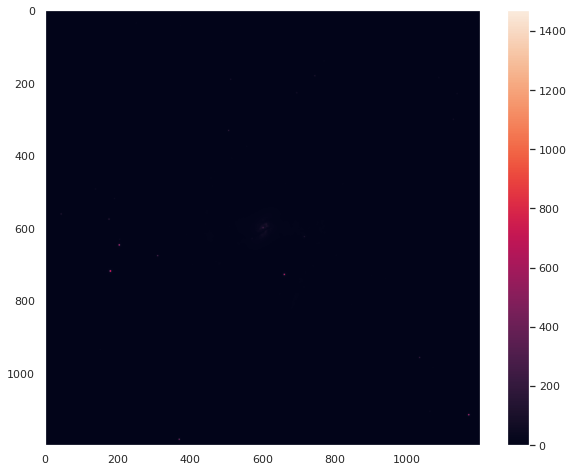

In [28]:
sns.set_style({'axes.grid' : False}) # Remove grid from seaborn
data = fits.getdata(output) # Very simple way to retrieve data only
plt.figure(figsize=(10, 8))
plt.imshow(data)
plt.colorbar()

Not very interesting... the secret here is that the imshow command sets the z-axis limits using the minimum and maximum values found in the array. However, we usually have something much brighter than our object, and they dominate the z-scale. Let's improve the visualization with a simple trick.

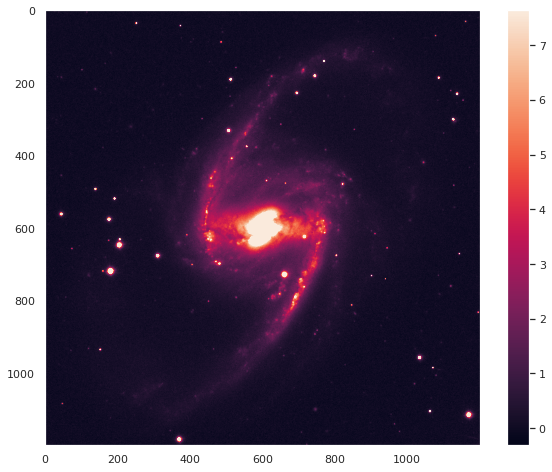

In [31]:
vmin_val = np.percentile(data, 1)
vmax_val = np.percentile(data, 99.5)
plt.figure(figsize=(10, 8))
plt.imshow(data, vmin=vmin_val, vmax=vmax_val)
plt.colorbar()

### Image manipulation example: Photometric calibration

The FITS images are not photometrically calibrated, that is, they are provided in instrumental units, not physical units. However, thanks to the work of Felipe Almeida, we have calibration zero points, which are the values used to make this calibration in practice. The S-PLUS is calibrated in the [AB magnitude](https://en.wikipedia.org/wiki/AB_magnitude) system, therefore, to convert from count rate ($C$) to physical units ($f_\nu$ in cgs units of erg s$^{−1}$ cm$^{−2}$ Hz$^{−1}$), we need to use the equation

\begin{equation}
f_\nu = 10^{-0.4 (48.6+m_0)}\cdot C
\end{equation}

Supposing we have the estimation of $m_0=23$. Then

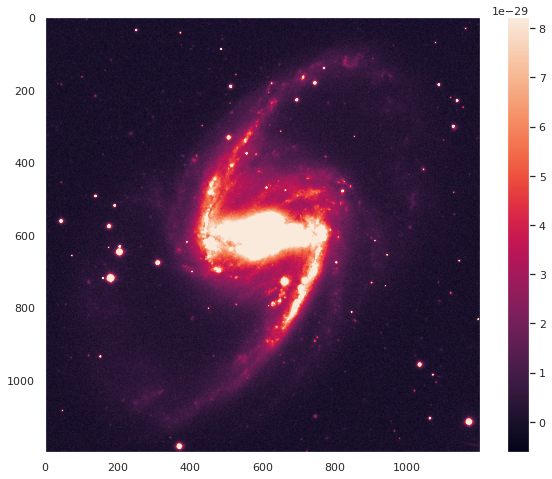

In [32]:
from astropy.visualization import quantity_support
quantity_support()
from matplotlib import pyplot as plt

m0 = 23.
fnu_unit = u.erg / (u.s * u.cm**2 * u.Hz)
fnu = np.power(10, -0.4 * (48.6 + m0)) * data * fnu_unit
vmin_val = np.percentile(fnu.value, 2) #----> Note the use of .value
vmax_val = np.percentile(fnu.value, 98) #------> Here again
plt.figure(figsize=(10, 8))
plt.imshow(fnu.value, vmin=vmin_val, vmax=vmax_val) #----> One more time!
plt.colorbar()

Note that not all matplotlib features (such as imshow) work with astropy.units! Whenever that is the case, use the .value method to access the pure-numpy array.

## Final challenge

The units from the AB magnitude system mean the flux per area element per frequency. However, sometimes we would like to change the units to of flux per area per wavelength element (Angstrom), $f_\lambda$. How can you do that? Produce an image of  NGC 1365 in those units. Is it different from the previous image produced with $f_\nu$?

Hint: for the R band, the effective wavelength is $\lambda=6258.0$ Angstrom.

## Lecture 7 assessement

One of the most important features of S-PLUS is the observation of the band F660, which contains information about the stellar formation rate of galaxies! Stars are formed in regions full of gas, which is heated and emits photons in specific lines according to quantum transitions. In particular, at the visible wavelenght $\lambda=6562$ Angstrom, a line called H$\alpha$ is produced by the Balmer transition from n=3--> n=2. Therefore, if a galaxy is nearby ($z\approx 0$), we could see this line very well with S-PLUS. However, observations get all photons emmited at given wavelenghts, including the emission line and the stellar continuum. One way to estimate the flux of the emission line is to use other bands to estimate the stellar continuum and subtract if from the flux in F660. For example, [Vilella-Rojo et al. (2015)](https://ui.adsabs.harvard.edu/abs/2015A%26A...580A..47V/abstract) provides one way to calculate the observed H$\alpha$ as 

\begin{equation}
F_{H\alpha} = \Delta_{F660} \frac{(F_{F660} - F_{R})}{1 - \frac{\Delta_{F660}}{\Delta_R}}
\end{equation}

Now, create a gallery of H$\alpha$ images for the six galaxies from the NGC catalog as seeing above! 

Additional info: 

$\Delta_{F660}$ = 125.3 Angstrom

$\Delta_{R}$ = 1419 Angstrom

Please, send us your solutions as a notebook containing only the challenge in the Slack.
